# Import libary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# load the data

In [2]:
data=pd.read_csv("summer.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [4]:
data.shape

(31165, 9)

In [5]:
data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


# check null value 

In [6]:
data.isnull()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
31160,False,False,False,False,False,False,False,False,False
31161,False,False,False,False,False,False,False,False,False
31162,False,False,False,False,False,False,False,False,False
31163,False,False,False,False,False,False,False,False,False


In [7]:
data.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [8]:
data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

# 1. In how many cities Summer Olympics is held so far?

In [9]:
data['City'].nunique()

22

# 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [10]:
x= data[data['Medal']=='Gold']

In [11]:
x

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


Top 5 Sports having most number of Gold Medals are: 

         Sport  Gold Medals
0     Aquatics         1421
1    Athletics         1215
17      Rowing          890
4   Gymnastics          820
3      Fencing          552


AxesSubplot(0.125,0.125;0.775x0.755)


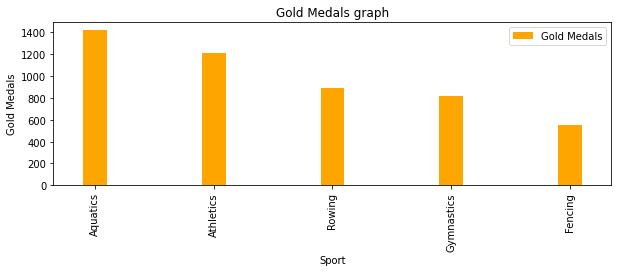

In [12]:
lst1 = []

for i in x ['Sport'].unique():
    lst1.append([i, len(x[x['Sport'] == i])])
    
data2 = pd.DataFrame(lst1,columns = ["Sport","Gold Medals"])

print("Top 5 Sports having most number of Gold Medals are: \n")
print(data2.sort_values(by = 'Gold Medals', ascending = False).head())
print("\n")
z=print(data2.sort_values(by = 'Gold Medals', ascending = False).head().plot(x='Sport',y='Gold Medals',kind='bar',figsize=(10,3),color="orange",width=0.2))
plt.xlabel("Sport")
plt.ylabel("Gold Medals")
plt.title("Gold Medals graph")
plt.show()



 # 3. Which sport is having most number of medals so far? (Top 5)¶

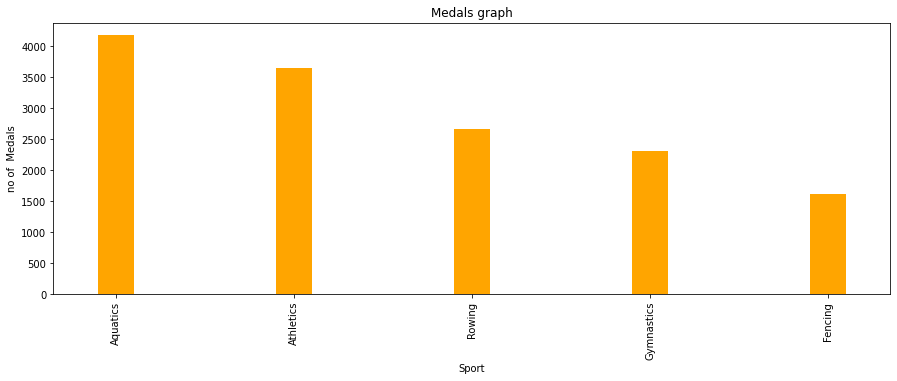

In [13]:
u=data.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(15, 5),color="orange",width=0.2)
plt.xlabel("Sport")
plt.ylabel("no of  Medals")
plt.title("Medals graph")
plt.show()


# 4.. Which player has won most number of medals? (Top 5)

Top 5 Athletes having most number of Medals are: 

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


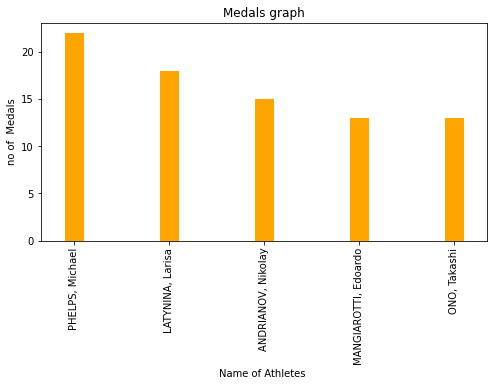

In [14]:
print("Top 5 Athletes having most number of Medals are: \n")
print(data.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head())
print("\n")
print(data.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head().plot(kind='bar',figsize=(8,4),color="orange",width=0.2))
plt.xlabel("Name of Athletes ")
plt.ylabel("no of  Medals")
plt.title("Medals graph")
plt.show()


# 5. Which player has won most number Gold Medals of medals? (Top 5)

 Athlete number of Gold Medals are: 

Athlete
PHELPS, Michael     18
LEWIS, Carl          9
NURMI, Paavo         9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


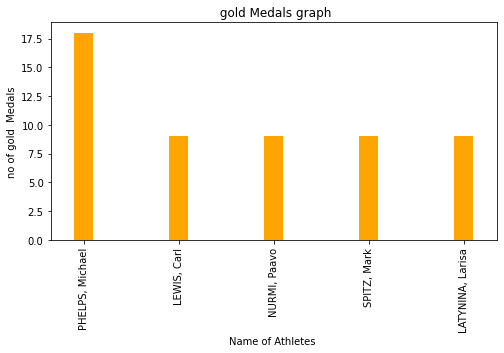

In [15]:
print(" Athlete number of Gold Medals are: \n")
print(x.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head())
print("\n")
print(x.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head().plot(kind='bar',figsize=(8,4),color="orange",width=0.2))
plt.xlabel("Name of Athletes ")
plt.ylabel("no of gold  Medals")
plt.title(" gold Medals graph")
plt.show()

# 6. In which year India won first Gold Medal in Summer Olympics?

In [16]:
gold_yr = x[x['Country'] == 'IND'].sort_values(by = 'Year').head(1)['Year'].item()
print(f"India won it's first Gold Medal in Summer Olympics in the year {gold_yr}.")

India won it's first Gold Medal in Summer Olympics in the year 1928.


# 7. Which event is most popular in terms on number of players? (Top 5)

Top 5 Most Popular Events in terms of Number of Players are: 

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


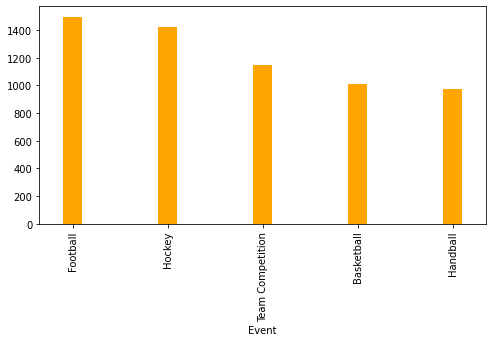

In [17]:
print("Top 5 Most Popular Events in terms of Number of Players are: \n")
print(data.groupby('Event').count()['Athlete'].sort_values(ascending = False).head())
print("\n")
print(data.groupby('Event').count()['Athlete'].sort_values(ascending = False).head().plot(kind='bar',figsize=(8,4),color="orange",width=0.2))

# 8 .Which sport is having most female Gold Medalists? (Top 5)

Top 5 Sports having most number of Female Gold Medalists are: 

         Sport  Number of Female Gold Medalists
4     Aquatics                              589
7    Athletics                              389
8   Gymnastics                              268
14      Rowing                              217
11  Volleyball                              166


AxesSubplot(0.125,0.125;0.775x0.755)


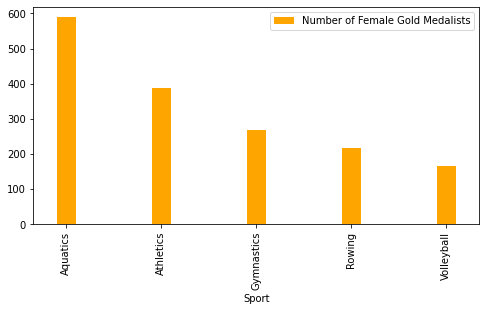

In [18]:
female = x[x['Gender'] == 'Women']

lst6 = []

for i in female['Sport'].unique():
    lst6.append([i, len(female[female['Sport'] == i])])

data3 = pd.DataFrame(lst6, columns = ["Sport","Number of Female Gold Medalists"])

print("Top 5 Sports having most number of Female Gold Medalists are: \n")
print(data3.sort_values(by = "Number of Female Gold Medalists", ascending = False).head())
print("\n")
print(data3.sort_values(by = "Number of Female Gold Medalists", ascending = False).head().plot(x="Sport",y="Number of Female Gold Medalists",kind = 'bar',figsize=(8,4),color="orange",width=0.2))